### Analysis of TV shows on Netflix, Disney+, Hulu, and Amazon Prime - comparing age groups, ratings, and year of release

Importing all libraries

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Importing data file

In [58]:
df = pd.read_csv('tv_shows.csv')
print(df.head())

   Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+  type  
0     0            0        0     1  
1     0            0        0     1  
2     0            0        0     1  
3     0            0        0     1  
4     0            0        0     1  


Clean/Tidy data

In [59]:
#size/length/how many missing values
print(df.shape)
df = df.drop_duplicates()
print(df.isna().sum())
#convert rotten tomatoes - remove % and make float
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].replace('[\%]', '', regex=True).astype('float')
#convert age - categorical in age order, will be ordinal cat
df.Age = pd.Categorical(df.Age, ['all', '7+', '13+', '16+', '18+'], ordered=True)
#check other data cleaning activities
print(df.head())

(5611, 11)
Unnamed: 0            0
Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64
   Unnamed: 0             Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96.0        1   
1           1   Stranger Things  2016  16+   8.8             93.0        1   
2           2       Money Heist  2017  18+   8.4             91.0        1   
3           3          Sherlock  2010  16+   9.1             78.0        1   
4           4  Better Call Saul  2015  18+   8.7             97.0        1   

   Hulu  Prime Video  Disney+  type  
0     0            0        0     1  
1     0            0        0     1  
2     0            0        0     1  
3     0            0        0     1  
4     0            0        0     1  


In [60]:
#average the IMDB and Rotten tomatoes ratings for graphing - keep value if only 1 rating
#convert IMDB to be on same scale
df.IMDb = df.IMDb*10
df['avg_rating'] = df[['IMDb', 'Rotten Tomatoes']].mean(axis=1)
print(df.head(10))
#BE CAREFUL BC IMDB TIMES 10 WILL KEEP X10 IF YOU RUN IT AGAIN

   Unnamed: 0                       Title  Year  Age  IMDb  Rotten Tomatoes  \
0           0                Breaking Bad  2008  18+  95.0             96.0   
1           1             Stranger Things  2016  16+  88.0             93.0   
2           2                 Money Heist  2017  18+  84.0             91.0   
3           3                    Sherlock  2010  16+  91.0             78.0   
4           4            Better Call Saul  2015  18+  87.0             97.0   
5           5                  The Office  2005  16+  89.0             81.0   
6           6                Black Mirror  2011  18+  88.0             83.0   
7           7                Supernatural  2005  16+  84.0             93.0   
8           8              Peaky Blinders  2013  18+  88.0             92.0   
9           9  Avatar: The Last Airbender  2005   7+  92.0            100.0   

   Netflix  Hulu  Prime Video  Disney+  type  avg_rating  
0        1     0            0        0     1        95.5  
1        1  

Noting that out of 5611 values, 2446 are missing an age rating, 1161 are missing an IMDb rating, and 4600 are missing a Rotten Tomatoes rating.

In [61]:
#separate out into individual DFs per streaming service
netflix = df[df.Netflix == 1]
hulu = df[df.Hulu == 1]
prime = df[df['Prime Video'] == 1]
disney = df[df['Disney+'] == 1]
print(prime.head())
#note there are some tv shows on multiple streaming services

    Unnamed: 0                           Title  Year  Age  IMDb  \
18          18            Parks and Recreation  2009  16+  86.0   
63          63  Star Trek: The Next Generation  1987   7+  86.0   
71          71                   The Good Wife  2009  16+  83.0   
77          77                  Schitt's Creek  2015  16+  84.0   
88          88                     Burn Notice  2007   7+  79.0   

    Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  type  avg_rating  
18             93.0        1     1            1        0     1        89.5  
63             89.0        1     1            1        0     1        87.5  
71             94.0        1     1            1        0     1        88.5  
77             50.0        1     0            1        0     1        67.0  
88             88.0        1     1            1        0     1        83.5  


Exploring the data

In [62]:
def year_data(df, streamer):
    print('On ' + streamer + ':')
    print('The average year of release is ' + str(round(df.Year.mean())))
    print('The oldest shows were released in ' + str(df.Year.min()))
    print('The newest shows were released in ' + str(df.Year.max()))

year_data(df, 'all streaming services')
year_data(netflix, 'Netflix')
year_data(hulu, 'Hulu')
year_data(prime, 'Amazon Prime')
year_data(disney, 'Disney+')

On all streaming services:
The average year of release is 2011
The oldest shows were released in 1901
The newest shows were released in 2020
On Netflix:
The average year of release is 2014
The oldest shows were released in 1914
The newest shows were released in 2020
On Hulu:
The average year of release is 2010
The oldest shows were released in 1931
The newest shows were released in 2020
On Amazon Prime:
The average year of release is 2009
The oldest shows were released in 1901
The newest shows were released in 2020
On Disney+:
The average year of release is 2010
The oldest shows were released in 1955
The newest shows were released in 2020


On average, Netflix has the newest tv shows (average year 2014), while the average year for Disney+, Hulu, and Amazon prime is pretty close (2009-2010) and a few years older than Netflix. This seems to show that either Netflix is putting out newer content more often and the other three streamers possibly have an older catalogue. All four streamers have the newest tv shows in 2020, showing that they are all putting ouy new content. Amazon Prime has the oldest tv show, going all the way back to 1901!

In [63]:
#avg age group w cat codes
median_index = np.median(df.Age.cat.codes)
med_age = df.Age[int(median_index)]
print('The median age group for a show is ' + med_age)
age_prop_table = df.Age.value_counts(normalize=True)
print(age_prop_table)
#table doesnt count nan

The median age group for a show is 18+
16+    0.321643
7+     0.267930
18+    0.236967
all    0.172196
13+    0.001264
Name: Age, dtype: float64


Of the tv shows with an age rating, it seems that most shows are rated 16+, which is the second oldest rating that a show could have. The median age group being 18+ means it is the middle value for the spread of how shows are rated. This does not mean that most shows on these streaming services are for older people, since we are missing the age value for many shows, but it does seem more likely that if a show is for people older than 16-18, a show is more likely to be given an age rating.

In [64]:
def imdb_data(df, streamer):
    print('On ' + streamer + ':')
    print('The average IMDb rating is ' + str(round(df.IMDb.mean(), 2)))
    print('The lowest IMDb rated show is ' + df.Title[df.IMDb == df.IMDb.min()].item() + ' with a rating of ' + str(df.IMDb.min()))
    print('The highest IMDb rated show is ' + df.Title[df.IMDb == df.IMDb.max()].item() + ' with a rating of ' + str(df.IMDb.max()))

imdb_data(df, 'all streaming services')
imdb_data(netflix, 'Netflix')
imdb_data(hulu, 'Hulu')
imdb_data(prime, 'Amazon Prime')
imdb_data(disney, 'Disney+')

On all streaming services:
The average IMDb rating is 71.13
The lowest IMDb rated show is Be With You with a rating of 10.0
The highest IMDb rated show is Destiny with a rating of 96.0
On Netflix:
The average IMDb rating is 71.63
The lowest IMDb rated show is Be With You with a rating of 10.0
The highest IMDb rated show is Breaking Bad with a rating of 95.0
On Hulu:
The average IMDb rating is 70.61
The lowest IMDb rated show is A Little Late with Lilly Singh with a rating of 17.0
The highest IMDb rated show is Destiny with a rating of 96.0
On Amazon Prime:
The average IMDb rating is 71.8
The lowest IMDb rated show is Toddlers & Tiaras with a rating of 18.0
The highest IMDb rated show is Malgudi Days with a rating of 95.0
On Disney+:
The average IMDb rating is 69.24
The lowest IMDb rated show is Bizaardvark with a rating of 35.0
The highest IMDb rated show is The Imagineering Story with a rating of 91.0


Overall, most of the shows on each streaming service have IMDb ratings of around 70/100, plus or minus about 1 point. Amazon Prime has the highest average rating at 71.8/100, and Disney+ has the lowest average at 69.24/100. The spread of averages is very small, which shows that the content for all 4 streamers is rated pretty similarly on IMDb. The lowest rated show is Be With You on Netflix with a 10/100, and the higest rated show is Destiny on Hulu with a rating of 96/100.

In [65]:
def rt_data(df, streamer):
    print('On ' + streamer + ':')
    print('The average Rotten Tomatoes rating is ' + str(round(df['Rotten Tomatoes'].mean(), 2)) + "%")
    if df.Title[df['Rotten Tomatoes'] == df['Rotten Tomatoes'].min()].count() > 1:
        print('The lowest Rotten Tomatoes rated shows are rated ' + str(df['Rotten Tomatoes'].min()) + '% and there are ' + str(df.Title[df['Rotten Tomatoes'] == df['Rotten Tomatoes'].min()].count()) + ' shows with this rating')
    else:
        print('The lowest Rotten Tomatoes rated show is ' + df.Title[df['Rotten Tomatoes'] == df['Rotten Tomatoes'].min()].item() + ' with a rating of ' + str(df['Rotten Tomatoes'].min()) + '%')
    print('The highest Rotten Tomatoes rated shows are rated ' + str(df['Rotten Tomatoes'].max()) + '% and there are ' + str(df.Title[df['Rotten Tomatoes'] == df['Rotten Tomatoes'].max()].count()) + ' shows with this rating')

rt_data(df, 'all streaming services')
rt_data(netflix, 'Netflix')
rt_data(hulu, 'Hulu')
rt_data(prime, 'Amazon Prime')
rt_data(disney, 'Disney+')

On all streaming services:
The average Rotten Tomatoes rating is 77.5%
The lowest Rotten Tomatoes rated show is Another Life with a rating of 6.0%
The highest Rotten Tomatoes rated shows are rated 100.0% and there are 109 shows with this rating
On Netflix:
The average Rotten Tomatoes rating is 77.96%
The lowest Rotten Tomatoes rated show is Another Life with a rating of 6.0%
The highest Rotten Tomatoes rated shows are rated 100.0% and there are 65 shows with this rating
On Hulu:
The average Rotten Tomatoes rating is 78.04%
The lowest Rotten Tomatoes rated shows are rated 9.0% and there are 2 shows with this rating
The highest Rotten Tomatoes rated shows are rated 100.0% and there are 33 shows with this rating
On Amazon Prime:
The average Rotten Tomatoes rating is 76.82%
The lowest Rotten Tomatoes rated show is The Bible with a rating of 14.0%
The highest Rotten Tomatoes rated shows are rated 100.0% and there are 18 shows with this rating
On Disney+:
The average Rotten Tomatoes rating i

The spread of average ratings on Rotten Tomatoes is also pretty similar for all 4 streaming services, with an average score of about 77% plus or minus about 2 or 3%. This is about 6% higher than shows were rated on IMDb, but we do have to remember we are missing data from both rating services so this may not be entirely accurate. Interestingly, Disney+ had the lowest IMDb average but the highest Rotten Tomatoes average of 81.25%. As well, Amazon Prime had the highest IMDb average but the lowest Rotten Tomatoes average at 76.82%. 
The lowest rated show on Rotten Tomatoes is also on Netflix, with a 6% rating, and there are 109 shows with a rating of 100% on Rotten Tomatoes, but Netflix has 65 of these shows.

In [66]:
def title_count(df, streamer):
    print('There are ' + str(len(df)) + ' TV shows on ' + streamer)

title_count(df, 'all streaming services')
title_count(netflix, 'Netflix')
title_count(hulu, 'Hulu')
title_count(prime, 'Amazon Prime')
title_count(disney, 'Disney+')

There are 5611 TV shows on all streaming services
There are 1931 TV shows on Netflix
There are 1754 TV shows on Hulu
There are 2144 TV shows on Amazon Prime
There are 180 TV shows on Disney+


When you break down how many shows per streaming service, the total for each is 1931 + 1754 + 2144 + 180 which equals 6009. There are 5611 total titles, which means that 398 titles are on more than one streaming service.

In [67]:
#analyze how many per streamer/multiples/overlap
netflix_exclusive = df[(df.Netflix == 1) & (df.Hulu == 0) & (df['Prime Video'] == 0) & (df['Disney+'] == 0)]
netflix_avg = round((100*len(netflix_exclusive)/len(netflix)),2)
print(str(netflix_avg) + '% of titles on Netflix are only streaming there')

hulu_exclusive = df[(df.Netflix == 0) & (df.Hulu == 1) & (df['Prime Video'] == 0) & (df['Disney+'] == 0)]
hulu_avg = round((100*len(hulu_exclusive)/len(hulu)),2)
print(str(hulu_avg) + '% of titles on Hulu are only streaming there')

prime_exclusive = df[(df.Netflix == 0) & (df.Hulu == 0) & (df['Prime Video'] == 1) & (df['Disney+'] == 0)]
prime_avg = round((100*len(prime_exclusive)/len(prime)),2)
print(str(prime_avg) + '% of titles on Amazon Prime are only streaming there')

disney_exclusive = df[(df.Netflix == 0) & (df.Hulu == 0) & (df['Prime Video'] == 0) & (df['Disney+'] == 1)]
disney_avg = round((100*len(disney_exclusive)/len(disney)),2)
print(str(disney_avg) + '% of titles on Disney+ are only streaming there')

90.52% of titles on Netflix are only streaming there
82.78% of titles on Hulu are only streaming there
88.11% of titles on Amazon Prime are only streaming there
86.67% of titles on Disney+ are only streaming there


Because there is some overlap with some shows being on multiple streaming services, I took a look at how many unique titles are on each streaming service. It looks like at least 80% of shows are unique to the service for most of the streaming services, but Netflix has the most unique titles at 90.52%. It would make sense that Amazon Prime has some similar titles to the other services, for you can buy seasons and episodes of some shows on Prime that are also streaming somewhere else. 

Graphing the Data

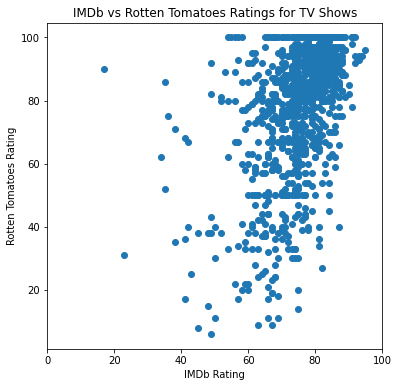

In [68]:
#scatter plot IMDB vs RT
plt.figure(figsize=(6,6))
ax = plt.subplot()
plt.scatter(x = df['IMDb'], y = df['Rotten Tomatoes'])
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('IMDb vs Rotten Tomatoes Ratings for TV Shows')
ax.set_xticks(range(0, 110, 20))
plt.savefig('rating_compare.png')
plt.show()

In comparing Rotten Tomatoes and IMDb ratings for the same shows, it is hard to see a clear pattern since there are so many data points with a big cluster. However, most of the data on the IMDb rating is clustered between 60 and 80%, where there seems to be a bigger spread on Rotten Tomatoes with much lower ratings but also quite a few 100% ratings. If we were to see a more linear pattern it woud suggest that Rotten Tomatoes and IMDb have similar rating, but does seem that IMDb ratings tend to be higher than those on Rotten Tomatoes for the same tv show. It is interesting because the average ratings for Rotten Tomatoes are higher, but there is a lot less of a spread on IMDb which could explain the lower average.

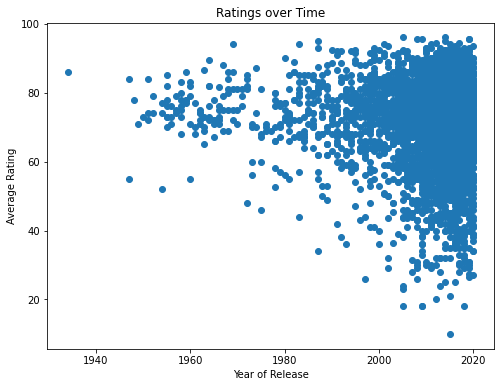

In [69]:
#scatter plot- year vs rating
plt.figure(figsize=(8, 6))
plt.scatter(x=df.Year, y=df.avg_rating)
plt.xlabel('Year of Release')
plt.ylabel("Average Rating")
plt.title('Ratings over Time')
plt.savefig('year_rating.png')
plt.show()

Again, we have so much data that it is hard to see specific patterns here. However, we can tell that from about 1940-1980, there was not as much tv content but it was rated pretty consitently higher than a 50%, about 70% overall which makes sense with our avarages from before. However, as more tv shows were created as seen by the higher density after the year 2000, the quality also changes, as in the 2000-2020 range there are shows ranking from 20% to 100%. This demonstrates that there is a lot more content over time, but because of that, there is a broader range of high and low rated tv shows - tv isn't necessarily getting better over time just because there is more of it.


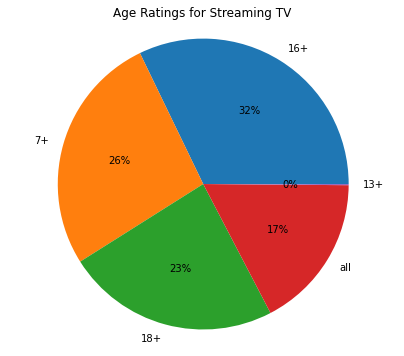

In [70]:
#pie chart w age ranges
plt.figure(figsize=(7, 6))
plt.pie(df.Age.value_counts(normalize=True), labels = df.Age.value_counts().index ,autopct = '%d%%', normalize=True)
plt.axis('equal')
plt.title('Age Ratings for Streaming TV')
plt.savefig('age_pie.png')
plt.show()


As previously stated, not all shows were given an age rating, but we can see here how the most shows with a rating are rated for ages 16+, but with a roughly equal breakdown of shows with the rating 7+, 18+, and for all ages, with 13+ rating barely making an impact.

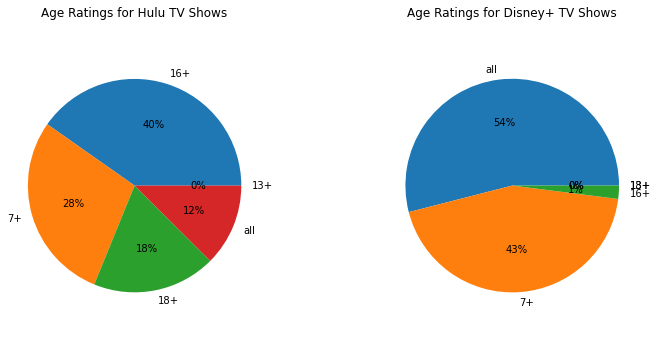

In [71]:
#compare age range hulu and disney
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
plt.pie(hulu.Age.value_counts(normalize=True), labels = hulu.Age.value_counts().index ,autopct = '%d%%', normalize=True)
plt.axis('equal')
plt.title('Age Ratings for Hulu TV Shows')
plt.subplot(1, 2, 2)
plt.pie(disney.Age.value_counts(normalize=True), labels = disney.Age.value_counts().index ,autopct = '%d%%', normalize=True)
plt.axis('equal')
plt.title('Age Ratings for Disney+ TV Shows')
plt.subplots_adjust(wspace=0.6)
plt.savefig('hulu_disney_age.png')
plt.show()

Disney owns both Hulu and Disney+, so I was curious to see the age rating breakdown between the two streaming services. The age breakdown on Hulu seems to pretty closely mirror the data for all streaming services, but for Disney+ the age ranges are almost 50/50 for all ages and for 7+, with anything older barely making up the data. This tracks with the perception that Disney will release their more "mature" titles on Hulu and leave the more family friendly ones on Disney+.

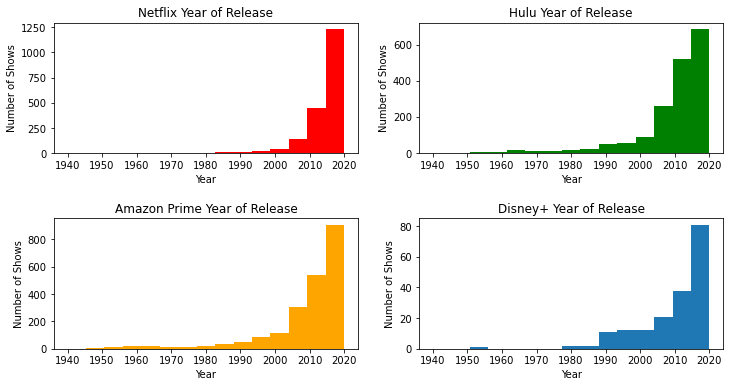

In [72]:
#4 sep histograms - distribution of release year for all services
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(netflix.Year, range =(1940, 2020), bins = 15, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.title('Netflix Year of Release')
plt.subplot(2, 2, 2)
plt.hist(hulu.Year, range =(1940, 2020), bins = 15, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.title('Hulu Year of Release')
plt.subplot(2, 2, 3)
plt.hist(prime.Year, range =(1940, 2020), bins = 15, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.title('Amazon Prime Year of Release')
plt.subplot(2, 2, 4)
plt.hist(disney.Year, range =(1940, 2020), bins = 15)
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.title('Disney+ Year of Release')
plt.subplots_adjust(hspace=.5)
plt.savefig('year_hist.png')
plt.show()

All four streaming services show a similar increase in content over time - more shows are being created and added to each service as time goes on. All of these graphs are left skewed. We can really see how drastically it spiked right before the 2010s, which woud line up for when streaming got really popular and original series were starting to be created. Netflix seems to have the most significant increase in new shows in the late 2010s, and Amazon Prime and Hulu seem to have more shows before the year 2000 than the other streamers.

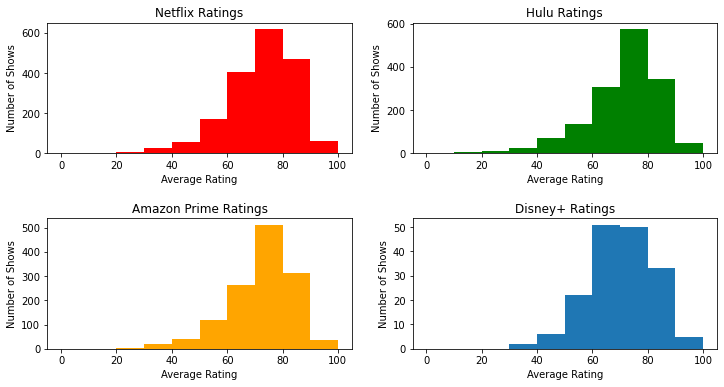

In [73]:
#histogram rating avg for all 4
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(netflix.avg_rating, range =(0, 100), bins = 10, color='red')
plt.xlabel('Average Rating')
plt.ylabel('Number of Shows')
plt.title('Netflix Ratings')
plt.subplot(2, 2, 2)
plt.hist(hulu.avg_rating, range =(0, 100), bins = 10, color='green')
plt.xlabel('Average Rating')
plt.ylabel('Number of Shows')
plt.title('Hulu Ratings')
plt.subplot(2, 2, 3)
plt.hist(prime.avg_rating, range =(0, 100), bins = 10, color='orange')
plt.xlabel('Average Rating')
plt.ylabel('Number of Shows')
plt.title('Amazon Prime Ratings')
plt.subplot(2, 2, 4)
plt.hist(disney.avg_rating, range =(0, 100), bins = 10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Shows')
plt.title('Disney+ Ratings')
plt.subplots_adjust(hspace=.5)
plt.savefig('rating_hist.png')
plt.show()

Again, even when split up, all four histograms seem to have a similar shape, almost approximating a normal distribution centered around 70% ratings. This aligns with the average tendencies we investigated earlier. They all also drop off significanty in the 90-100% rating range, showing that it is rarer to have a tv show that is rated so highly. The biggest difference I can see in the data is that the Disney+ histogram has a peak from the 60-80% range where the other streamers all have peaks exclusively in the 70-80% range. 

Conclusion

Overall, Netflix, Hulu, Amazon Prime, and Disney+ all have tv shows that are rated similarly, and the data does not point to one streaming service clearly having the "best" tv shows compared to the others. Rotten Tomatoes tended to rate tv shows higher than IMDb, but the averages across all streamers were all in the 70-80% range for both rating services. A 75% is a passing grade, so it seems like all 4 streaming services have good content! The data also shows how much the "Golden Age of TV" is where we have been recently, because there are more and more shows being added in recent years compared to in the past. However, the range of ratings has definitely increased since 2000, so with many many more highly rated shows comes many more low rated shows. One of the most interesting things was that Disney+ mainly has tv shows for all ages or 7+, where Hulu, owned by Disney also, has shows rated for many different age groups, which shows how Disney is dividing up where to put their streaming content. 

I expected there to be more of a "frontrunner" in terms of how shows are rated, but all 4 of these streaming services seem to have a similar makeup of ratings. Prime has the most tv shows on their streaming service, but they also have shows availabe to purchase that are also streaming on other shows, so there is definitely some overlap on the services, which could be why we have such similar data across the streamers.